In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import statsmodels
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model
from sklearn.metrics import r2_score
from statsmodels.tools.eval_measures import mse,rmse
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import lag_plot
from pandas import Grouper
df = pd.read_csv('artificial_1.csv' ,parse_dates=["date"])

#df.to_string()
print(df.head())

        date      value  temperature
0 2018-01-01  72.624345          6.0
1 2018-01-02  65.388244         10.0
2 2018-01-03  65.471828         11.0
3 2018-01-04  64.927031          8.0
4 2018-01-05  66.865408         10.0


In [3]:
df["date"] = pd.to_datetime(df['date'], dayfirst=True)
df.head()

,date,value,temperature
0,2018-01-01,72.624345,6.0
1,2018-01-02,65.388244,10.0
2,2018-01-03,65.471828,11.0
3,2018-01-04,64.927031,8.0
4,2018-01-05,66.865408,10.0


In [4]:
df.describe()

,value,temperature
count,730.000000,730.000000
mean,49.989105,19.399589
std,12.999962,9.225776
min,27.762913,-3.000000
25%,35.910607,11.000000
50%,53.346350,21.000000
75%,63.424536,28.000000
max,72.624345,36.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         730 non-null    datetime64[ns]
 1   value        730 non-null    float64       
 2   temperature  730 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 17.2 KB


In [6]:
df.isna().sum()


date           0
value          0
temperature    0
dtype: int64

In [7]:
df.duplicated().sum()

0

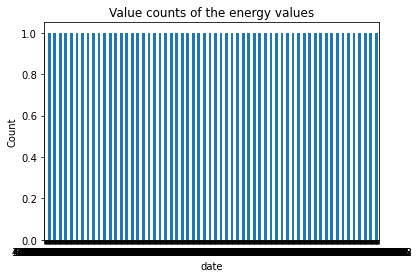

In [8]:
df.value.value_counts().plot(kind="bar")
plt.title("Value counts of the energy values")
plt.xlabel("date")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

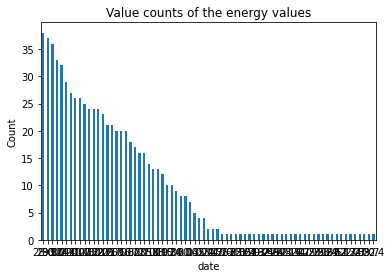

In [9]:
df.temperature.value_counts().plot(kind="bar")
plt.title("Value counts of the energy values")
plt.xlabel("date")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

<AxesSubplot:title={'center':'The Plot of Temperature and Value'}, xlabel='date'>

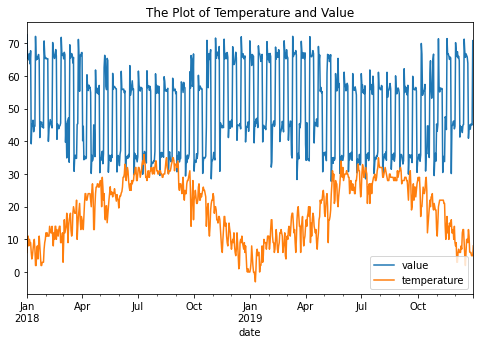

In [10]:

df.plot(x="date", y=["value", "temperature"],  figsize=(8, 5),title= 'The Plot of Temperature and Value', xlabel='date')


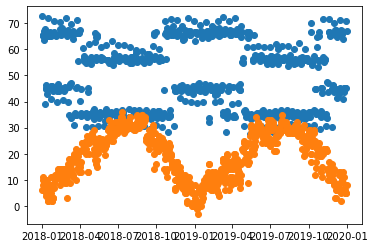

In [11]:
plt.scatter(x=df["date"], y=df["value"])
plt.scatter(x=df["date"], y=df["temperature"])


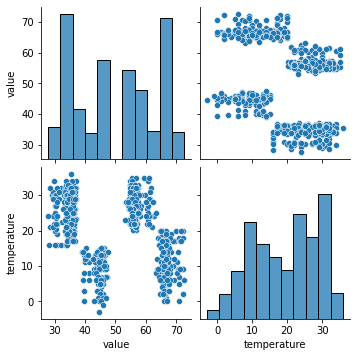

In [12]:
sns.pairplot(df)


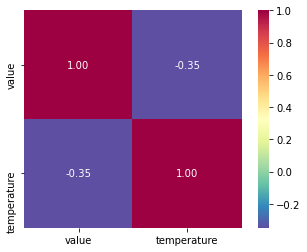

In [13]:
corrmat = df.corr()
hm = sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={"size":10},cmap ="Spectral_r")
plt.show()

<AxesSubplot:xlabel='value', ylabel='temperature'>

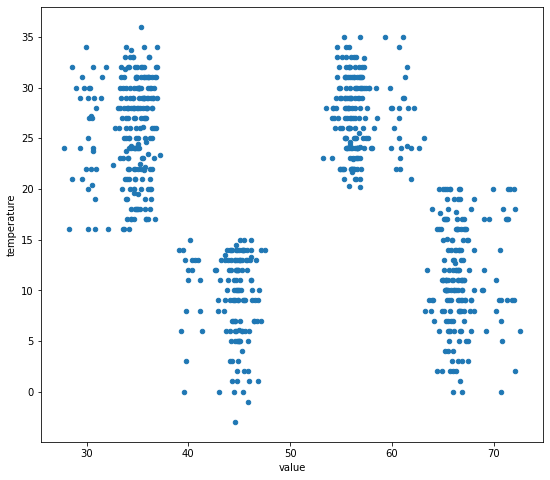

In [14]:
df.plot.scatter(x="value", y="temperature",  figsize=(9, 8))

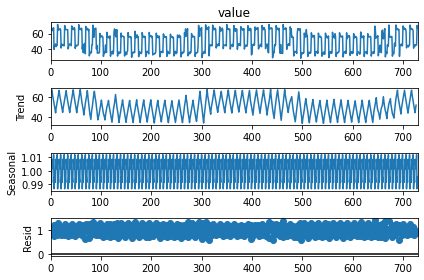

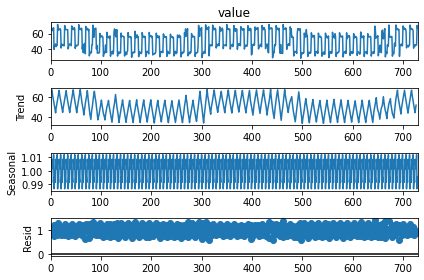

In [16]:
#SEASONALITY
from statsmodels.tsa.seasonal import seasonal_decompose
nresult = seasonal_decompose(df["value"], model='multiplicable',period=7)
nresult.plot()


        date      value  temperature
0 2018-01-01  72.624345          6.0
1 2018-01-02  65.388244         10.0
2 2018-01-03  65.471828         11.0
3 2018-01-04  64.927031          8.0
4 2018-01-05  66.865408         10.0
        date      value  temperature  valuesliced datesliced  tempsliced
0 2018-01-01  72.624345          6.0    72.624345 2018-01-01         6.0
1 2018-01-02  65.388244         10.0    65.388244 2018-01-02        10.0
2 2018-01-03  65.471828         11.0    65.471828 2018-01-03        11.0
3 2018-01-04  64.927031          8.0    64.927031 2018-01-04         8.0
4 2018-01-05  66.865408         10.0    66.865408 2018-01-05        10.0 
 6


<AxesSubplot:title={'center':'The Plot of Value  and Temperature in 3 months'}, xlabel='datesliced'>

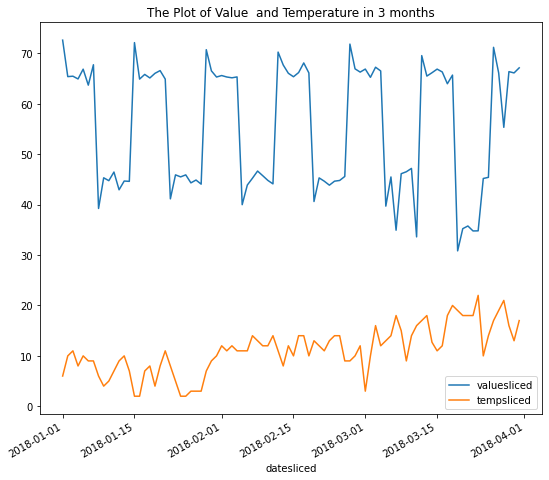

In [212]:
copy=df.copy()
print(copy.head())
copy["valuesliced"]=copy["value"][0:90]
copy["datesliced"]=copy["date"][0:90]
copy["tempsliced"]=copy["temperature"][0:90]
print(copy.head(),'\n',copy.shape[1])
copy.plot(x="datesliced", y=["valuesliced","tempsliced"],  figsize=(9, 8), title= "The Plot of Value  and Temperature in 3 months")

In [215]:
##extracting monthly averages
df['date'] = pd.to_datetime(df.date)
m = df['date'].dt.month
finall = df.iloc[:366].groupby(m).mean()
finall2=df.iloc[366:].groupby(m).mean()
# Rename month 1 to January, 2 to February, etc.
finall.index = pd.date_range('1/1/2018', '12/31/2018', freq='MS').strftime('%B')
finall2.index= pd.date_range('1/1/2019', '12/31/2019', freq='MS').strftime('%B')
mean_month=pd.concat([finall, finall2],axis=0)
mean_month["date"]=mean_month.index
print(new)

               value  temperature       date
January    56.913687     6.437500    January
February   55.575127    11.750000   February
March      54.122448    15.183871      March
April      46.963121    22.206667      April
May        45.957350    22.603226        May
June       44.883610    27.930000       June
July       46.135417    31.354839       July
August     46.622477    31.496774     August
September  47.300417    26.466667  September
October    46.522813    21.548387    October
November   53.388913    14.376667   November
December   55.016894     6.290323   December
January    56.167942     5.166667    January
February   54.708443     9.678571   February
March      54.957979    13.096774      March
April      50.936220    16.033333      April
May        46.626665    23.483871        May
June       44.859697    28.233333       June
July       46.949565    28.706452       July
August     46.551567    29.580645     August
September  45.314050    26.900000  September
October   

<AxesSubplot:title={'center':'The Mean Value of Months'}, xlabel='date'>

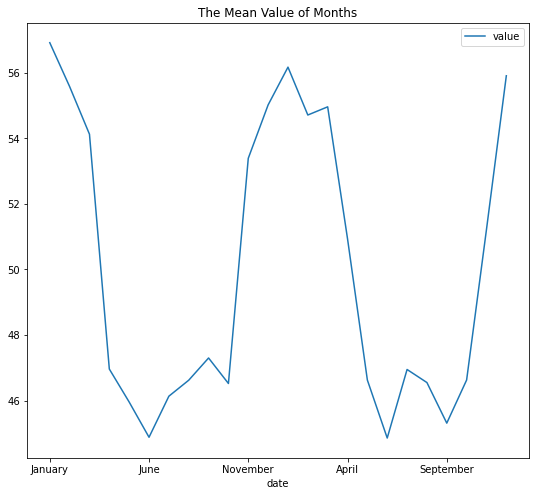

In [217]:
mean_month.plot(x="date", y=["value"],  figsize=(9, 8), title = 'The Mean Value of Months')

In [218]:
##extracting weekly averages
df['date'] = pd.to_datetime(df.date)
m = df['date'].dt.week
finall = df.iloc[:366].groupby(m).mean()
finall2=df.iloc[366:].groupby(m).mean()
# Rename month 1 to January, 2 to February, etc.
finall.index = pd.date_range('1/1/2018', '12/31/2018', freq='W').strftime('%B')
finall2.index= pd.date_range('1/1/2019', '12/31/2019', freq='W').strftime('%B')
new_week=pd.concat([finall, finall2],axis=0)
new_week["date"]=new_week.index
print(new_week)

              value  temperature      date
January   67.134612     7.111111   January
January   44.000565     6.857143   January
January   66.501143     6.000000   January
January   44.529611     3.714286   January
February  66.281490    10.285714  February
...             ...          ...       ...
December  42.906058    12.285714  December
December  66.717467     6.000000  December
December  43.805438     9.285714  December
December  66.762112     7.285714  December
December  44.230209     7.442857  December

[104 rows x 3 columns]


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='date'>

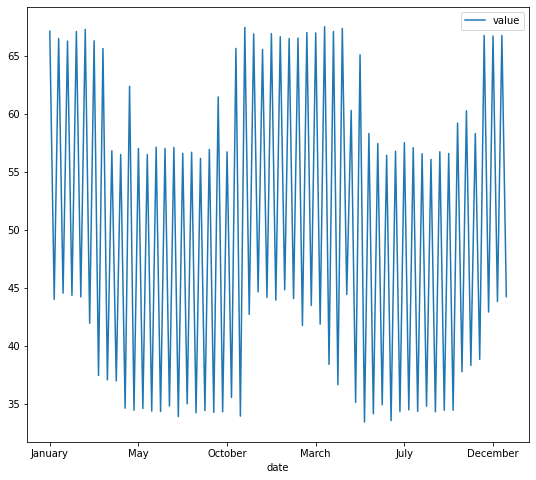

In [219]:
new_week.plot(x="date", y=["value"],  figsize=(9, 8))

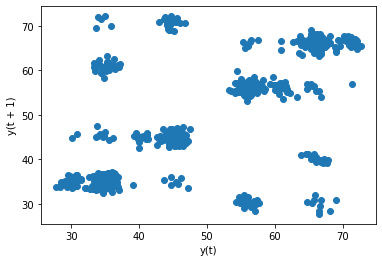

In [225]:
lag_plot(df["value"])

plt.show()

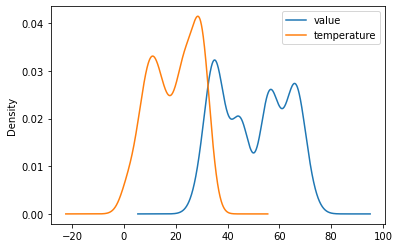

In [30]:
#Density plot
dfdf = pd.read_csv('artificial_1.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
dfdf.plot(kind='kde')
plt.show()


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


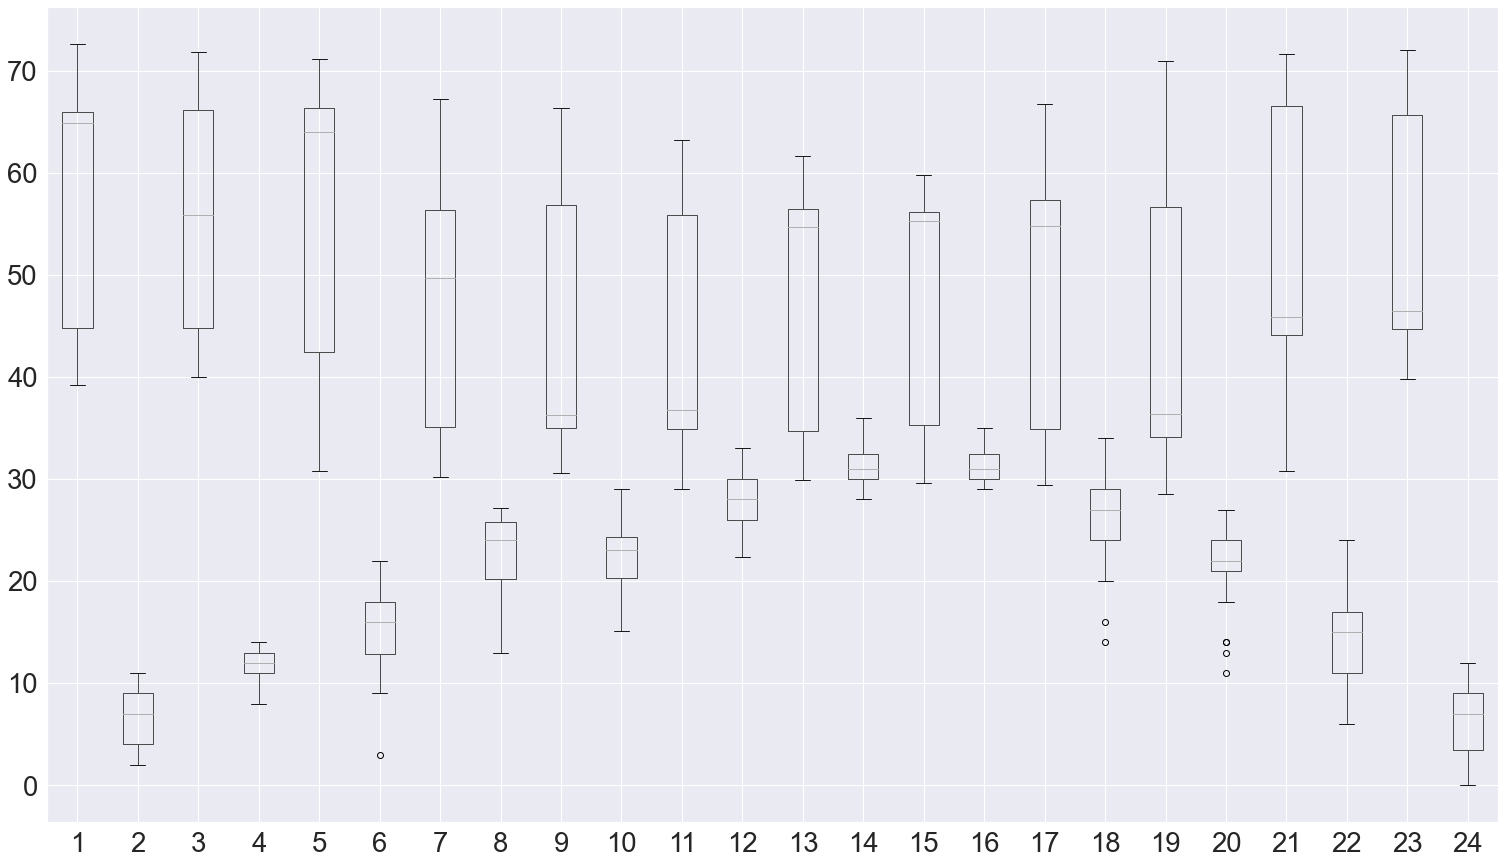

In [34]:
one_year = dfdf['2018']
f, ax = plt.subplots(figsize=(26, 15))
sns.set(font_scale = 2.5)
groups = one_year.groupby(Grouper(freq='M'))
months = pd.concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,25)
months.boxplot()
plt.show()

In [20]:
pip install statsmodels==0.13.1


Note: you may need to restart the kernel to use updated packages.


In [18]:
from statsmodels.tsa.ar_model import AutoReg
df_train = df.value.iloc[:-60]
df_test = df.value.iloc[-60:]
model = AutoReg(df_train.astype(float), lags=45).fit()

In [19]:
forecasts = model.forecast(60).tolist()
test_values = df_test.tolist()
for index in range(len(forecasts)):
  difference = forecasts[index] - test_values[index]
  print(forecasts[index], test_values[index], difference)

39.024193416305664 43.10473305 -4.080539633694336
38.156405985056075 45.08972912 -6.933323134943926
66.84427088901771 71.41026575 -4.565994860982286
65.77053479425763 56.85987097 8.910663824257625
59.81083619433155 55.10131681 4.70951938433155
56.40644677438965 56.31965694 0.08678983438964849
55.03949189633428 56.3181542 -1.278662303665719
59.426541356542636 55.98076837 3.445772986542636
61.273414003552375 56.15001628 5.123397723552372
30.99688262959981 30.46353432 0.5333483095998091
35.38514860966267 35.39788042 -0.012731810337328398
41.7653114453912 34.00398911 7.761322335391199
41.55449828666095 33.80413849 7.750359796660952
42.55049632860069 47.50598029 -4.95548396139931
37.492768142953494 46.91979229 -9.427024147046502
36.511499739879085 43.60830612 -7.096806380120917
65.50045963889347 71.45021774 -5.949758101106525
64.28573048991325 66.62743708 -2.3417065900867584
59.66808960990929 66.75133724 -7.08324763009071
56.733506320784095 66.14039544 -9.406889119215911
55.81053917455728 6

In [20]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(test_values, forecasts))

40.06353320227183


In [21]:
from sklearn.metrics import r2_score
r2_score(forecasts,test_values)

0.7294885044359026

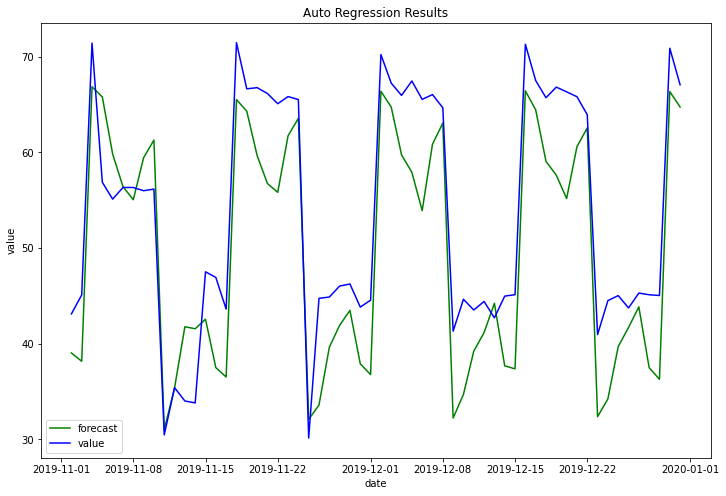

In [26]:
fig = plt.subplots(figsize=(12,8))
plt.plot(df.date.iloc[-60:],forecasts, color="green")
plt.plot(df.date.iloc[-60:],test_values,color="blue")
plt.legend(['forecast','value'])
plt.title('Auto Regression Results')
plt.xlabel('date')
plt.ylabel('value')

plt.show()

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


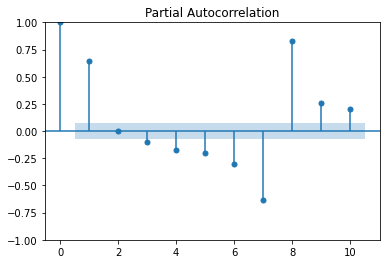

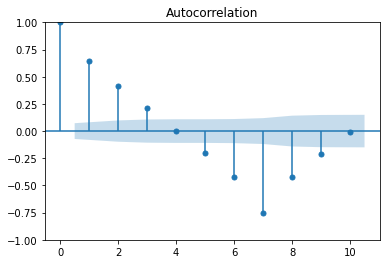

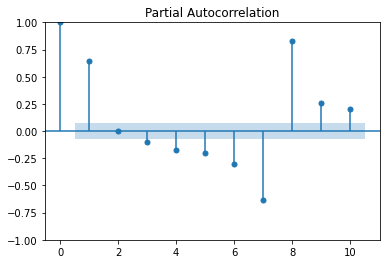

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['value'], lags=10)
plot_pacf(df['value'], lags=10)

In [27]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.163252
p-value: 0.219852


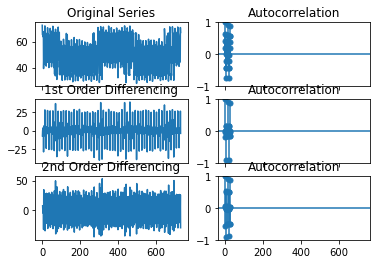

In [28]:
from statsmodels.graphics.tsaplots import plot_acf
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])
plt.show()


# ARIMA without feature engineering

In [31]:
!pip install pmdarima

In [51]:
test_df = df.copy()
train_set = test_df.iloc[:670]
test_set = test_df.iloc[670:]
x_train, x_test = np.array(range(train_set.shape[0])), np.array(range(train_set.shape[0], df.shape[0]))
train_set.shape, x_train.shape, test_set.shape, x_test.shape


((670, 3), (670,), (60, 3), (60,))

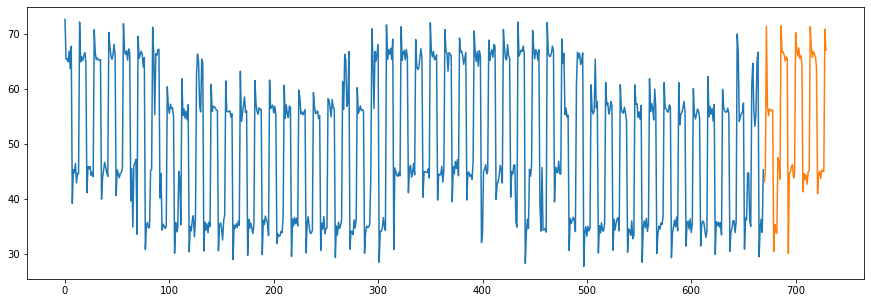

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train_set.value)
ax.plot(x_test, test_set.value)

In [54]:
from pmdarima.arima import auto_arima
model = auto_arima(train_set.value, start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=None,          
                      seasonal=False,   
                      start_P=0, 
                      D=1, 
                      trace=False,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

In [55]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  670
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -2489.537
Date:                Sun, 14 Aug 2022   AIC                           4985.075
Time:                        22:32:56   BIC                           4998.597
Sample:                             0   HQIC                          4990.312
                                - 670                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     17.6374      2.795      6.310      0.000      12.159      23.116
ar.L1          0.6452      0.055     11.662      0.000       0.537       0.754
sigma2        98.7723      6.866     14.385      0.000      85.315     112.230
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               139.52
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                            -0.13
Prob(H) (two-sided):                  0.74   Kurtosis:                         5.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
# Forecast

prediction, confint = model.predict(n_periods=60, return_conf_int=True)

prediction
cf= pd.DataFrame(confint)

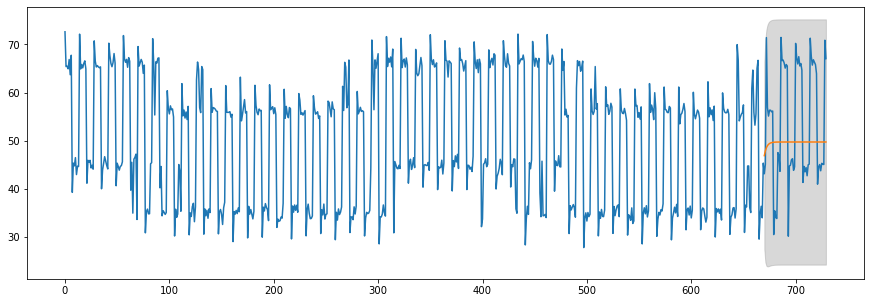

In [57]:
prediction_series = pd.Series(prediction,index=test_set.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(test_df.value)
ax.plot(prediction_series)
ax.fill_between(prediction_series.index,
                cf[0],
                cf[1],color='grey',alpha=.3)

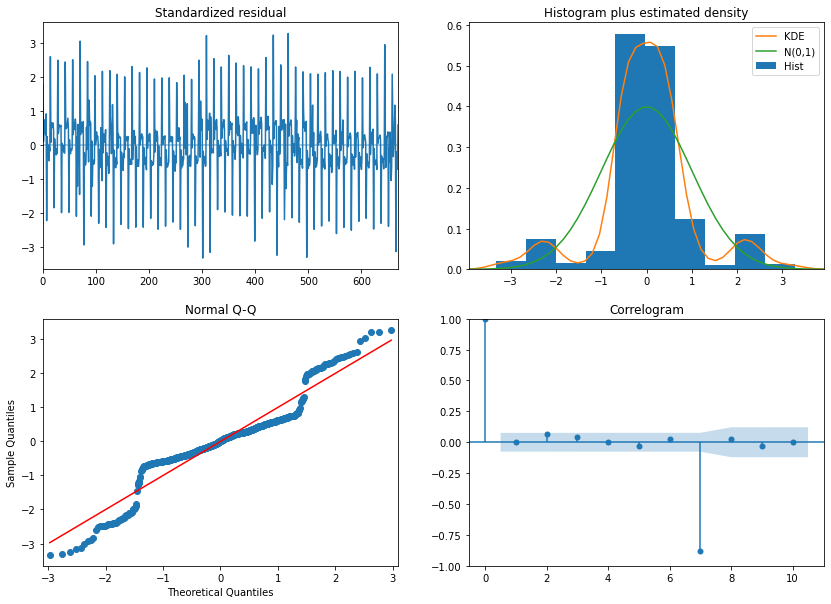

In [58]:
model.plot_diagnostics(figsize=(14,10))
plt.show()

In [80]:
def evaluatereg(actual,prediction):
    
    return  ('MSE = ', mse(actual, prediction), 'RMSE = ', rmse(actual, prediction),'R2 score =', r2_score(actual,prediction), 'MAPE =',np.mean(np.abs((prediction - actual) /np.abs(actual))) * 100) 

In [81]:
print(evaluatereg(test_set.value,prediction))

('MSE = ', 164.38005211908316, 'RMSE = ', 12.821078430423984, 'R2 score =', -0.11341396489132327, 'MAPE =', 20.67860394616509)


# SARIMAX

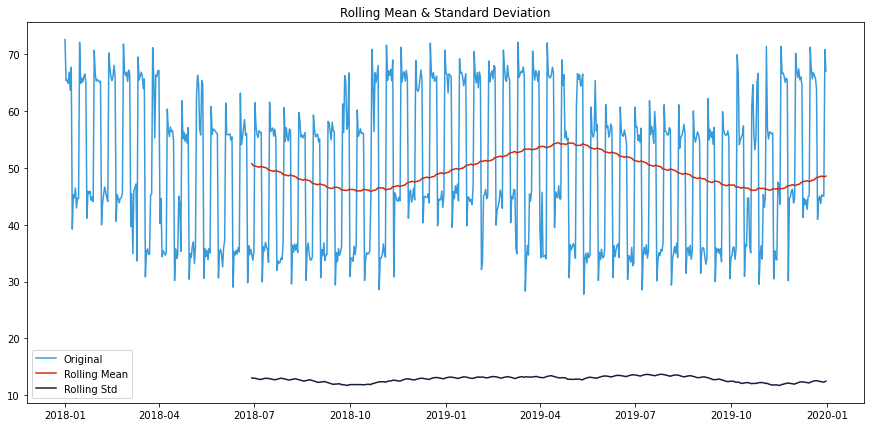

In [89]:
#Determine rolling statistics
copyset["rolling_avg"] = copyset["value"].rolling(window=180).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
copyset["rolling_std"] = copyset["value"].rolling(window=180).std()

#Plot rolling statistics
plt.figure(figsize=(15,7))
plt.plot(copyset["value"], color='#379BDB', label='Original')
plt.plot(copyset["rolling_avg"], color='#D22A0D', label='Rolling Mean')
plt.plot(copyset["rolling_std"], color='#142039', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [172]:
copyset2 = df.copy()
trainset = copyset2.iloc[:670]
testset = copyset2.iloc[670:]
model_autoarima = auto_arima(trainset["value"],exog=trainset.drop(columns="value"),
                              start_p=0, start_q=0,start_Q=0,max_P=5,max_Q=5,
                              test='kpss',
                              max_p=5, max_q=5, m=7,
                              start_P=0, seasonal=True,
                              d=None, D=None,
                              trace=False,
                              error_action='ignore',  
                              suppress_warnings=True,
                              stepwise=True)
#m = 7 as data contains daily observations


In [173]:
model_autoarima.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  670
Model:             SARIMAX(1, 0, 1)x(4, 0, 1, 7)   Log Likelihood               -1689.601
Date:                           Thu, 18 Aug 2022   AIC                           3397.201
Time:                                   10:22:32   BIC                           3437.767
Sample:                                        0   HQIC                          3412.914
                                           - 670                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     16.6469      2.568      6.482      0.000      11.613      21.680
ar.L1          0.7533      0.035     21.414      0.000       0.684       0.822
ma.L1         -0.1926      0.048     -3.985      0.000      -0.287      -0.098
ar.S.L7       -0.9052      0.044    -20.638      0.000      -0.991      -0.819
ar.S.L14       0.1119      0.052      2.162      0.031       0.010       0.213
ar.S.L21       0.2323      0.051      4.522      0.000       0.132       0.333
ar.S.L28       0.2115      0.040      5.260      0.000       0.133       0.290
ma.S.L7        0.8462      0.039     21.688      0.000       0.770       0.923
sigma2         8.6988      0.433     20.094      0.000       7.850       9.547
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):               172.30
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                             0.11
Prob(H) (two-sided):                  0.94   Kurtosis:                         5.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [176]:

lastmodel = SARIMAX(trainset['value'],exog=trainset["temperature"],order = (1,0,1),seasonal_order=(4,0,1,7),enforce_invertibility=False)
results = lastmodel.fit()
results.summary()

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             value   No. Observations:                  670
Model:             SARIMAX(1, 0, 1)x(4, 0, 1, 7)   Log Likelihood               -1679.396
Date:                           Thu, 18 Aug 2022   AIC                           3376.792
Time:                                   10:24:14   BIC                           3417.358
Sample:                                        0   HQIC                          3392.505
                                           - 670                                         
Covariance Type:                             opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
temperature    -0.4224      0.019    -21.692      0.000      -0.461      -0.384
ar.L1           0.9792      0.020     47.957      0.000       0.939       1.019
ma.L1          -0.6958      0.027    -25.318      0.000      -0.750      -0.642
ar.S.L7         0.5377      0.025     21.386      0.000       0.488       0.587
ar.S.L14        0.7153      0.009     76.581      0.000       0.697       0.734
ar.S.L21       -0.5369      0.025    -21.468      0.000      -0.586      -0.488
ar.S.L28        0.2833      0.009     30.405      0.000       0.265       0.302
ma.S.L7        -0.9464      0.018    -53.264      0.000      -0.981      -0.912
sigma2          8.0089      0.320     25.028      0.000       7.382       8.636
===================================================================================
Ljung-Box (L1) (Q):                   3.12   Jarque-Bera (JB):                25.47
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               1.22   Skew:                            -0.04
Prob(H) (two-sided):                  0.13   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [179]:
start=len(trainset)
end=len(trainset)+len(testset)-1
predictions = results.predict(start=start, end=end,exog=testset["temperature"], dynamic=False).rename('Predicted')

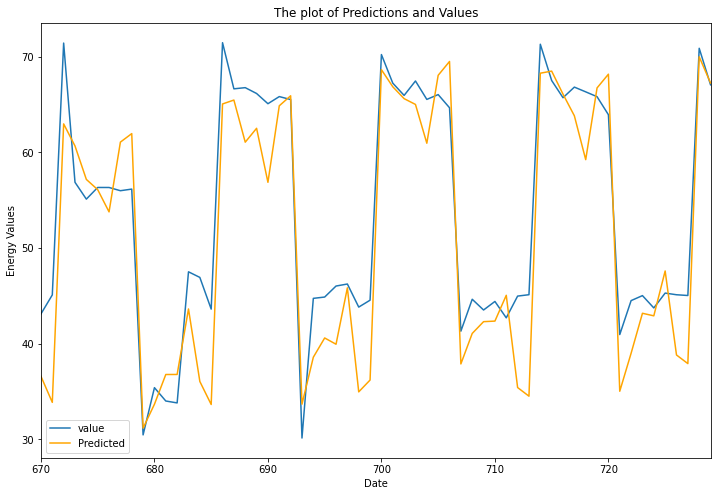

In [226]:
# Plot predictions against known values
title='The plot of Predictions and Values'
ylabel='Energy Values'
xlabel='Date'

ax = testset['value'].plot(legend=True,figsize=(12,8),title=title)
predictions.plot(legend=True,color = 'orange')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in testset.query('temperature==1').index: 
    ax.axvline(x=x, color='red', alpha = 0.5);

In [181]:
print(evaluatereg(testset.value,predictions))

('MSE = ', 25.643909859468284, 'RMSE = ', 5.063981621162174, 'R2 score =', 0.8263032102504633, 'MAPE =', 8.160561638498624)


In [231]:
lastlastmodel = SARIMAX(trainset["value"].append(testset["value"]),exog=trainset["temperature"].append(testset["temperature"]),order=(1,0,1),seasonal_order=(4,0,1,7),enforce_invertibility=False)
result2=lastlastmodel.filter(results.params)
pred = result2.predict()

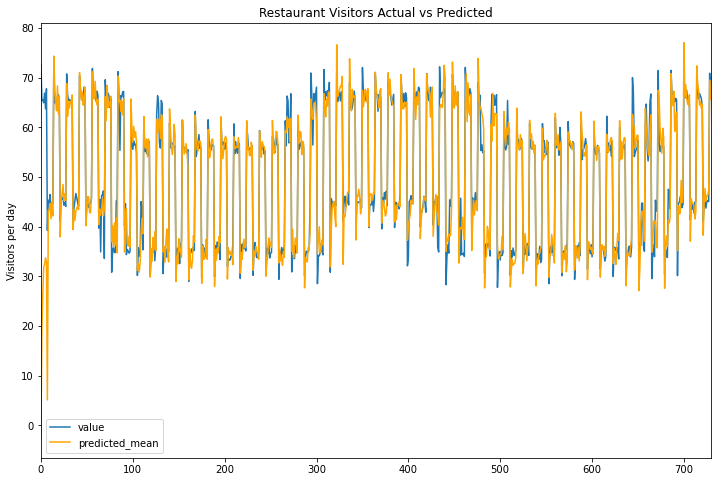

In [232]:
title='Restaurant Visitors Actual vs Predicted'
ylabel='Visitors per day'
xlabel=''

ax = trainset["value"].append(testset["value"]).plot(legend=True,figsize=(12,8),title=title)
pred.plot(legend=True, color = 'orange')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in testset.query('temperature==1').index: 
    ax.axvline(x=x, color='red', alpha = 0.5);

In [190]:
print(evaluatereg(testset.value,predictions))

('MSE = ', 25.643909859468284, 'RMSE = ', 5.063981621162174, 'R2 score =', 0.8263032102504633, 'MAPE =', 8.160561638498624)
